In [3]:
#importing relevant libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **1.	What would be the suggested steps to make this Supervised Learning Model?**
*   First we need to clean and do some preprocessing on the data so that ML models can be applied to it.
*   splitting the data into training and test set, model will be trained on training set and tested on test set and error will be calculated.
*   Using a basic Machine Learning model and testing the error. Let it be logistic Regression or SVM.
*   Then we use several different ML algorithms such as Decision Tree, SVM, Naive Bayes, KNN and also bagging and pasting algorithms. Voting classifier can also be used. Powerful techniques such as Boosting techniques like gradient boosting and XGBoost can also be used.
*   If these generic models are not giving promising accuracy, we can use Neural Network such as ANN. These are relativily slow to train but have given decent accuracy. We can even visualize the validation error and test error after every epoch which tells about the behaviour of the model and can select the best hyperparamters. 
*   We train the model on all the above algorithms and select the model giving the least error i.e. maximum accuracy on the test set.
*   We then tune the hyperparameters of the selected algorithm using either GRIDSearchCV or RandomizedSearchCV depending on the level of tuning we are doing. Latter is computationally relevant while former is for the best parameters but may take too much time. If time can be compromised, then we should definitely go with GRIDSearchCV.
*   We divide the training data into one more section called Validation set to find the cross validation score (K-fold cross validation, or we can use any other type of validation method) and find the best hyperparameters by checking the validation and test accuracy. If they are preety much the same, then model is good enough else there might be cases of overfitting or underfitting the data.
*   After hyperparameter tuning and finding the lowest error parameters, the model is ready to be used for the new unseen data i.e. for the future models, Or as the data increases we can re-train the model for better accuracy i.e. better generalisation of the model on the future dataset.












### **2.	What are some of the challenges you oversee from the dataset shared?**
*   The data was in portuguese. So, it had to be converted into English for the general understanding.
*   There were several non-ASCII characters in the data that had to be removed.
*   Several rows were empty in the Purchasing_City column, which had to be removed.

### **3.	Do you consider a need to apply any preprocessing on the training dataset? If so, why?**
**Preprocesing starts after this Text block* 

*   Removed non-ASCII values from the **category of expenses** column.
*   converted date object to **dateTime** format for their use in analysis. 
*   Converting the dtype of **amount** from object to **float** and removed unnecessary characters like "-", replaced "," by "." to make sure the data transforms into float.
* Created **dummy variables** for the gender column and created a **new feature male** and removed the old gender feature. This was done because ML models expects data to be in numeric form.







### **Preprocessing**

In [4]:
#importing the semi-colon seperated data
df = pd.read_csv("Data/base_poupacerto_20200519.csv", encoding = 'latin', sep=';')
df.head()     

,id,celular,safra_abertura,cidade,estado,idade,sexo,limite_total,limite_disp,data,valor,grupo_estabelecimento,cidade_estabelecimento,"pais_estabelecimento,,,"
0,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,04/12/19,31,SERVIï¿½ï¿½ï¿½O,"SAO ,,",NaN
1,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,09/11/19,"150,01",FARMACIAS,SANTOS,"BR,"
2,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,06/05/19,50,SERVIï¿½ï¿½ï¿½O,"SAO ,,",NaN
3,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,01/06/19,"54,4",M.O.T.O.,OSASCO,"BR,"
4,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,01/06/19,"32,79",M.O.T.O.,OSASCO,"BR,"


In [5]:
#no. of unique users in the data
df.id.nunique()

29

In [6]:
#checking the null values
df.isnull().sum()

id                            0
celular                       0
safra_abertura                0
cidade                        0
estado                        0
idade                         0
sexo                          0
limite_total                  0
limite_disp                   0
data                          0
 valor                        0
grupo_estabelecimento         0
cidade_estabelecimento       19
pais_estabelecimento,,,    1796
dtype: int64

*   *City and Country has some missing values (Comparitively lower than the whole data)*









In [7]:
df.shape

(4955, 14)



*   *Total 4955 rows in the data with 14 columns (features) with 29 users in total*






In [8]:
#unique values in the columns
df.nunique(axis=0)

id                           29
celular                      29
safra_abertura               23
cidade                       10
estado                        2
idade                        20
sexo                          2
limite_total                 55
limite_disp                3801
data                        403
 valor                     2710
grupo_estabelecimento        25
cidade_estabelecimento      196
pais_estabelecimento,,,      14
dtype: int64

In [9]:
#columns in the data
print(df.columns)
#converting the columns into Enlish Language for better understanding
df.columns = ['id', 'mob_no', 'branch_no', 'city', 'state', 'age', 'gender',
              'total_CC_limit', 'current_avl_limit', 'date', 'amount', 'categ_exp', 'purchasing_city', 'purchasing_country']

Index(['id', 'celular', 'safra_abertura', 'cidade', 'estado', 'idade', 'sexo',
       'limite_total', 'limite_disp', 'data', ' valor ',
       'grupo_estabelecimento', 'cidade_estabelecimento',
       'pais_estabelecimento,,,'],
      dtype='object')


In [10]:
df.head()

,id,mob_no,branch_no,city,state,age,gender,total_CC_limit,current_avl_limit,date,amount,categ_exp,purchasing_city,purchasing_country
0,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,04/12/19,31,SERVIï¿½ï¿½ï¿½O,"SAO ,,",NaN
1,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,09/11/19,"150,01",FARMACIAS,SANTOS,"BR,"
2,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,06/05/19,50,SERVIï¿½ï¿½ï¿½O,"SAO ,,",NaN
3,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,01/06/19,"54,4",M.O.T.O.,OSASCO,"BR,"
4,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,01/06/19,"32,79",M.O.T.O.,OSASCO,"BR,"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4955 non-null   object
 1   mob_no              4955 non-null   object
 2   branch_no           4955 non-null   int64 
 3   city                4955 non-null   object
 4   state               4955 non-null   object
 5   age                 4955 non-null   int64 
 6   gender              4955 non-null   object
 7   total_CC_limit      4955 non-null   int64 
 8   current_avl_limit   4955 non-null   int64 
 9   date                4955 non-null   object
 10  amount              4955 non-null   object
 11  categ_exp           4955 non-null   object
 12  purchasing_city     4936 non-null   object
 13  purchasing_country  3159 non-null   object
dtypes: int64(4), object(10)
memory usage: 542.1+ KB


In [12]:
df.date

0       04/12/19
1       09/11/19
2       06/05/19
3       01/06/19
4       01/06/19
          ...   
4950    23/01/20
4951    23/01/20
4952    19/02/20
4953    30/03/20
4954    24/01/20
Name: date, Length: 4955, dtype: object

In [13]:
#converting date to datetime format
df.date = pd.to_datetime(df.date)

In [14]:
df.date

0      2019-04-12
1      2019-09-11
2      2019-06-05
3      2019-01-06
4      2019-01-06
          ...    
4950   2020-01-23
4951   2020-01-23
4952   2020-02-19
4953   2020-03-30
4954   2020-01-24
Name: date, Length: 4955, dtype: datetime64[ns]

In [15]:
df.head()

,id,mob_no,branch_no,city,state,age,gender,total_CC_limit,current_avl_limit,date,amount,categ_exp,purchasing_city,purchasing_country
0,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,2019-04-12,31,SERVIï¿½ï¿½ï¿½O,"SAO ,,",NaN
1,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,2019-09-11,"150,01",FARMACIAS,SANTOS,"BR,"
2,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,2019-06-05,50,SERVIï¿½ï¿½ï¿½O,"SAO ,,",NaN
3,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,2019-01-06,"54,4",M.O.T.O.,OSASCO,"BR,"
4,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,2019-01-06,"32,79",M.O.T.O.,OSASCO,"BR,"


In [16]:
df.amount = df.amount.apply(lambda x : x.replace(',', '.').replace('.', ''))  #replacing comma with decimal, removing unnnecessary full stop
i = df[df.amount==' -   '].index     # index of non-specified value in amount columns (-), needed to be removed
df.drop(i, inplace=True)
df.amount = df.amount.astype(float)      #converting amount to float

In [17]:
#converted amount to float and date to dateTime format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4942 entries, 0 to 4954
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  4942 non-null   object        
 1   mob_no              4942 non-null   object        
 2   branch_no           4942 non-null   int64         
 3   city                4942 non-null   object        
 4   state               4942 non-null   object        
 5   age                 4942 non-null   int64         
 6   gender              4942 non-null   object        
 7   total_CC_limit      4942 non-null   int64         
 8   current_avl_limit   4942 non-null   int64         
 9   date                4942 non-null   datetime64[ns]
 10  amount              4942 non-null   float64       
 11  categ_exp           4942 non-null   object        
 12  purchasing_city     4935 non-null   object        
 13  purchasing_country  3147 non-null   object      

In [18]:
#converting gender to dummy variables
dummy = pd.get_dummies(df.gender, drop_first=True)       #removed gender feature and replaced with male (1 for male, 0 for female) 
df = pd.concat([df, dummy], axis = 1)
df.drop('gender', axis = 1, inplace=True)
df.rename(columns = {'M':'male'}, inplace = True) 

In [19]:
#converting duplicates of SERVICO into single entity
df.categ_exp = df.categ_exp.apply(lambda x:"SERVICO" if x[:3]=='SER' else x)

In [20]:
df.head()

,id,mob_no,branch_no,city,state,age,total_CC_limit,current_avl_limit,date,amount,categ_exp,purchasing_city,purchasing_country,male
0,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,5605,2019-04-12,31.0,SERVICO,"SAO ,,",NaN,0
1,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,5343,2019-09-11,15001.0,FARMACIAS,SANTOS,"BR,",0
2,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2829,2019-06-05,50.0,SERVICO,"SAO ,,",NaN,0
3,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2547,2019-01-06,544.0,M.O.T.O.,OSASCO,"BR,",0
4,"4,52863E+11",+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2515,2019-01-06,3279.0,M.O.T.O.,OSASCO,"BR,",0


In [21]:
#replacing id with consecutive integers for better visualization
new_id = list(range(1, len(df.id.unique())+1))
print(new_id)
df.id.replace(df.id.unique(), new_id, inplace=True)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [22]:
df.head()

,id,mob_no,branch_no,city,state,age,total_CC_limit,current_avl_limit,date,amount,categ_exp,purchasing_city,purchasing_country,male
0,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,5605,2019-04-12,31.0,SERVICO,"SAO ,,",NaN,0
1,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,5343,2019-09-11,15001.0,FARMACIAS,SANTOS,"BR,",0
2,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2829,2019-06-05,50.0,SERVICO,"SAO ,,",NaN,0
3,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2547,2019-01-06,544.0,M.O.T.O.,OSASCO,"BR,",0
4,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2515,2019-01-06,3279.0,M.O.T.O.,OSASCO,"BR,",0


In [23]:
df.id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

### **4.  How would you execute data from any one of the indicators (highlighted in yellow on slide 4) for 1 of the profiles mentioned and across one of the 4 time frames referred on that same slide to analyze user consumption trends ?**
*   Here, I'm going to execute the data for the **COVID** (**March 18 - May 2020**).







In [24]:
#let us differentiate the data for the covid era
df_covid = df[(df.date>='2020-03-18') & (df.date<='2020-05-31')]

In [25]:
df_covid.head()

,id,mob_no,branch_no,city,state,age,total_CC_limit,current_avl_limit,date,amount,categ_exp,purchasing_city,purchasing_country,male
5,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2636,2020-05-05,449.0,ARTIGOS ELETRO,OSASCO,"BR,",0
7,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2789,2020-03-21,5.0,M.O.T.O.,SAO PAULO,"BR,,",0
11,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,1706,2020-04-04,36045.0,M.O.T.O.,LNKD.IN/BILL,"IE,",0
29,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2770,2020-04-20,40.0,SERVICO,"SAO ,,",NaN,0
30,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2188,2020-03-25,3.0,M.O.T.O.,SAO PAULO,"BR,,",0


In [26]:
df_covid.describe()

,id,branch_no,age,total_CC_limit,current_avl_limit,amount,male
count,333.000000,333.000000,333.000000,333.00000,333.000000,333.000000,333.000000
mean,16.096096,201664.021021,35.129129,11359.63964,8012.639640,7943.399399,0.504505
std,7.727849,242.185138,6.423190,12114.93779,11984.266785,18798.435823,0.500732
min,1.000000,201008.000000,20.000000,500.00000,12.000000,1.000000,0.000000
25%,11.000000,201508.000000,31.000000,4200.00000,1201.000000,129.000000,0.000000
50%,16.000000,201710.000000,34.000000,6500.00000,3565.000000,957.000000,1.000000
75%,23.000000,201901.000000,39.000000,10500.00000,6420.000000,7495.000000,1.000000
max,29.000000,201910.000000,53.000000,40000.00000,50000.000000,174999.000000,1.000000


#### 1. Frequency of use

In [27]:
covid_count = pd.DataFrame(df_covid.groupby(by='id')['amount'].count().sort_values())
covid_count.columns = ['frequency']
covid_count.head()

,frequency
id,
2,1
4,3
7,3
8,4
5,5


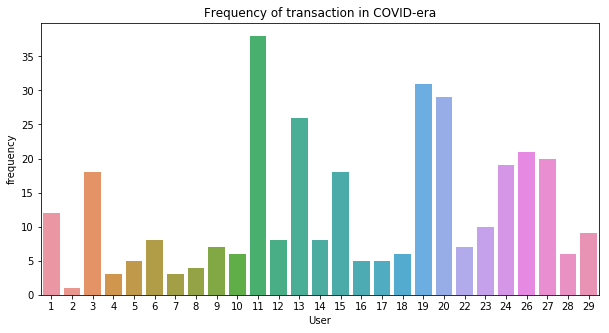

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x = covid_count.index, y=covid_count.frequency)
plt.title('Frequency of transaction in COVID-era')
plt.xlabel('User')
plt.ylabel('frequency')
plt.show()

#### *  *frequency varying from 1 to 38 with an average of 12.33*

In [32]:
covid_count.describe()

,frequency
count,27.000000
mean,12.333333
std,9.801884
min,1.000000
25%,5.500000
50%,8.000000
75%,18.500000
max,38.000000


#### 2. essential vs non-essential

In [33]:
df.head()

,id,mob_no,branch_no,city,state,age,total_CC_limit,current_avl_limit,date,amount,categ_exp,purchasing_city,purchasing_country,male
0,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,5605,2019-04-12,31.0,SERVICO,"SAO ,,",NaN,0
1,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,5343,2019-09-11,15001.0,FARMACIAS,SANTOS,"BR,",0
2,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2829,2019-06-05,50.0,SERVICO,"SAO ,,",NaN,0
3,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2547,2019-01-06,544.0,M.O.T.O.,OSASCO,"BR,",0
4,1,+55 (11) 96387-9924,201405,CAMPO LIMPO PAULISTA,SP,37,4700,2515,2019-01-06,3279.0,M.O.T.O.,OSASCO,"BR,",0


In [48]:
for x in df[df.id==8]['total_CC_limit']:
    print(x)

10500
10500
10500
10500
10500
10500
10500
10500
10500
10500
10500
10500
10500
10500
10500
1426
10500
10500
10500
10500
10500
10500
10500
10500
1426
10500
10500
10500
10500
